In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

In [4]:
data = pd.read_csv("./churn_prediction.csv")

In [3]:
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [6]:
numerical_col = data.select_dtypes(["int","float"]).columns

In [7]:
numerical_col

Index(['customer_id', 'vintage', 'age', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [9]:
data[data["current_balance"] == data["current_balance"].min()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
12608,13467,2140,80,Male,0.0,retired,1096.0,1,27,-5503.96,...,1694.57,868.26,9471.01,2680.04,15229.44,7859.37,1050.17,2002.97,1,2019-12-26


In [10]:
data[data["current_balance"] == data["current_balance"].max()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
9908,10575,2223,90,NaN,NaN,self_employed,243.0,2,2542,5905904.03,...,5700289.57,5010170.1,5232.34,1452.87,17327.27,17248.3,5778184.77,5720144.5,0,2019-12-13


In [11]:
data[numerical_col].max()

customer_id                          30301.00
vintage                               2476.00
age                                     90.00
dependents                              52.00
city                                  1649.00
customer_nw_category                     3.00
branch_code                           4782.00
current_balance                    5905904.03
previous_month_end_balance         5740438.63
average_monthly_balance_prevQ      5700289.57
average_monthly_balance_prevQ2     5010170.10
current_month_credit              12269845.39
previous_month_credit              2361808.29
current_month_debit                7637857.36
previous_month_debit               1414168.06
current_month_balance              5778184.77
previous_month_balance             5720144.50
churn                                    1.00
dtype: float64

(array([ 343.,  531., 1902., 4989., 6135., 4886., 3849., 2984., 1392.,
        1371.]),
 array([ 1. ,  9.9, 18.8, 27.7, 36.6, 45.5, 54.4, 63.3, 72.2, 81.1, 90. ]),
 <BarContainer object of 10 artists>)

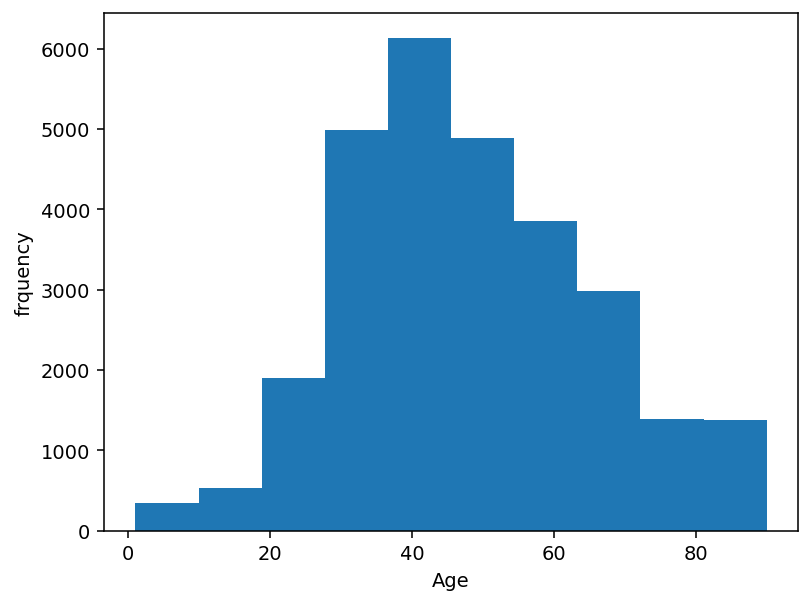

In [18]:
plt.figure(dpi= 140)
plt.xlabel("Age")
plt.ylabel("frquency")
plt.hist(data["age"])

In [19]:
data["age"].skew()

0.33058929557517264

In [23]:
data["age"].kurtosis()

-0.16866785691275865

(array([2.0000e+00, 7.0000e+00, 3.8000e+01, 7.1000e+01, 2.9100e+02,
        7.9200e+02, 2.0040e+03, 4.9560e+03, 1.0197e+04, 1.0024e+04]),
 array([  73. ,  313.3,  553.6,  793.9, 1034.2, 1274.5, 1514.8, 1755.1,
        1995.4, 2235.7, 2476. ]),
 <BarContainer object of 10 artists>)

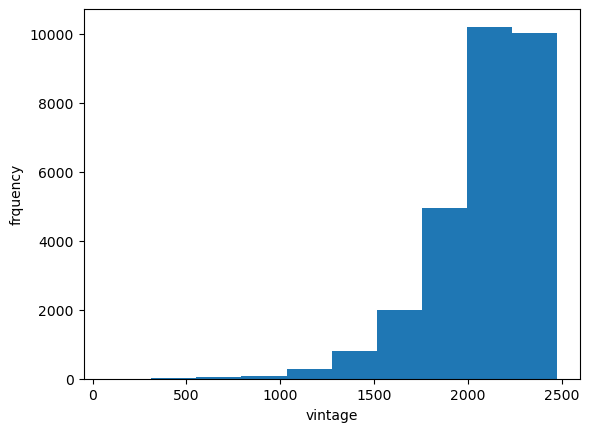

In [29]:
plt.xlabel("vintage") 
plt.ylabel("frquency")
plt.hist(data["vintage"])

# discrate disterbution

In [32]:
data["gender"].value_counts()

gender
Male      16548
Female    11309
Name: count, dtype: int64

In [33]:
data['gender'].value_counts()/ sum(data['gender'].value_counts().values)

gender
Male      0.594034
Female    0.405966
Name: count, dtype: float64

In [35]:
data['gender'].value_counts(normalize = True)

gender
Male      0.594034
Female    0.405966
Name: proportion, dtype: float64

In [10]:
numerical = data.select_dtypes(["int64" ,"float64"])[:200]

In [11]:
numerical

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,2101,66,0.0,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,2348,35,0.0,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2194,31,0.0,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,2329,90,NaN,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,1579,42,2.0,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,210,2145,55,0.0,569.0,2,1638,7110.16,8816.34,7008.65,2727.10,823.37,1020.09,2627.20,2742.04,7493.78,9016.52,0
196,211,2328,64,0.0,1589.0,3,33,2479.97,2475.07,2477.79,1496.70,0.07,0.07,0.07,0.07,2477.60,2475.07,1
197,212,2248,52,NaN,1492.0,3,2533,1464.17,2297.93,2173.34,3646.72,0.26,0.26,834.01,0.26,1924.17,2297.93,0
198,213,2225,41,0.0,1412.0,2,2179,3975.23,4675.23,4473.45,4053.59,0.11,714.40,700.11,712.97,4071.78,4674.76,0


In [14]:
numerical.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,0.046013,-0.036226,-0.092826,0.029322,0.147596,0.066862,-0.030719,-0.052612,-0.001375,-0.064976,0.099197,0.033082,0.085548,0.056162,0.035902,-0.032635,-0.032214
vintage,0.046013,1.000000,0.063484,-0.022383,0.065674,-0.183783,-0.023493,0.057852,0.067651,0.042887,0.091478,-0.019871,0.054362,0.002661,0.040032,0.028318,0.065377,0.031990
age,-0.036226,0.063484,1.000000,0.030260,0.032993,-0.086854,-0.178784,0.081915,0.128302,0.143565,0.094553,0.184326,0.175614,0.216853,0.145024,0.207862,0.081537,0.034715
dependents,-0.092826,-0.022383,0.030260,1.000000,0.082739,-0.036813,-0.032358,0.082041,0.009937,0.010234,0.001744,0.027902,0.117319,-0.012540,0.198151,-0.033980,0.013830,-0.021957
city,0.029322,0.065674,0.032993,0.082739,1.000000,0.063016,-0.023952,0.057578,0.048815,-0.019775,0.011055,-0.088119,-0.045758,-0.108106,-0.105913,-0.065761,0.026192,0.019138
customer_nw_category,0.147596,-0.183783,-0.086854,-0.036813,0.063016,1.000000,0.155490,-0.194578,-0.184883,-0.288164,-0.269290,-0.174283,-0.206906,-0.185698,-0.301015,-0.252552,-0.244487,0.011459
branch_code,0.066862,-0.023493,-0.178784,-0.032358,-0.023952,0.155490,1.000000,0.064834,0.043267,0.070284,0.052555,-0.058255,-0.047678,-0.116929,-0.041596,0.052743,0.086288,0.042218
current_balance,-0.030719,0.057852,0.081915,0.082041,0.057578,-0.194578,0.064834,1.000000,0.723973,0.713440,0.798778,0.115548,0.043382,-0.012512,-0.017455,0.531983,0.745552,-0.236671
previous_month_end_balance,-0.052612,0.067651,0.128302,0.009937,0.048815,-0.184883,0.043267,0.723973,1.000000,0.827158,0.687092,-0.029726,0.218648,0.132130,0.063467,0.507273,0.913823,-0.019883
average_monthly_balance_prevQ,-0.001375,0.042887,0.143565,0.010234,-0.019775,-0.288164,0.070284,0.713440,0.827158,1.000000,0.718274,0.336139,0.307698,0.400762,0.352276,0.808304,0.920945,0.034132


In [18]:
c  = numerical.corr().abs()
s =  c.unstack()
s

customer_id  customer_id               1.000000
             vintage                   0.046013
             age                       0.036226
             dependents                0.092826
             city                      0.029322
                                         ...   
churn        current_month_debit       0.194967
             previous_month_debit      0.220570
             current_month_balance     0.025783
             previous_month_balance    0.016198
             churn                     1.000000
Length: 324, dtype: float64

In [22]:
so = s.sort_values(kind= "quicksort" , ascending= False)

In [23]:
so

customer_id                     customer_id                       1.000000
average_monthly_balance_prevQ   average_monthly_balance_prevQ     1.000000
dependents                      dependents                        1.000000
city                            city                              1.000000
customer_nw_category            customer_nw_category              1.000000
                                                                    ...   
vintage                         current_month_debit               0.002661
average_monthly_balance_prevQ2  dependents                        0.001744
dependents                      average_monthly_balance_prevQ2    0.001744
customer_id                     average_monthly_balance_prevQ     0.001375
average_monthly_balance_prevQ   customer_id                       0.001375
Length: 324, dtype: float64

In [24]:
so = pd.DataFrame(so,columns=["person corraltion"])

In [25]:
so

,,person corraltion
customer_id,customer_id,1.000000
average_monthly_balance_prevQ,average_monthly_balance_prevQ,1.000000
dependents,dependents,1.000000
city,city,1.000000
customer_nw_category,customer_nw_category,1.000000
...,...,...
vintage,current_month_debit,0.002661
average_monthly_balance_prevQ2,dependents,0.001744
dependents,average_monthly_balance_prevQ2,0.001744
customer_id,average_monthly_balance_prevQ,0.001375


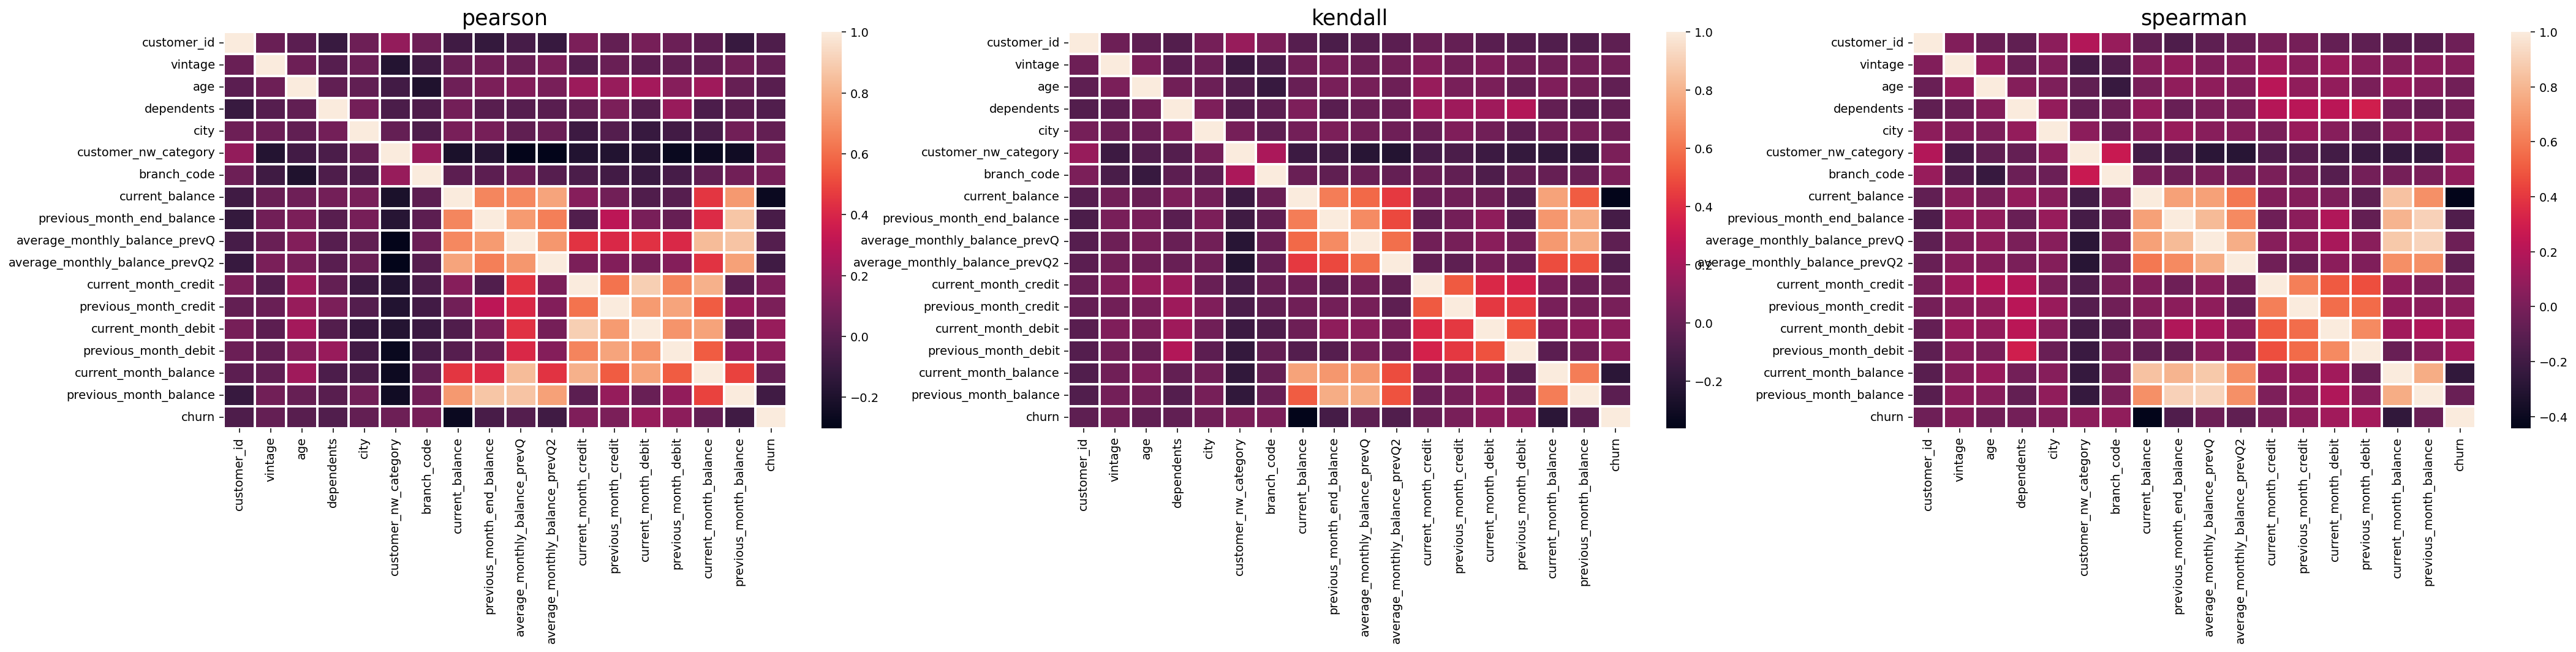

In [31]:
plt.figure(figsize= (36,6) , dpi = 140)
for j,i in enumerate(["pearson","kendall","spearman"]):
    plt.subplot(1,3,j+1)
    correlation = numerical.dropna().corr(method= i)
    
    sbs.heatmap(correlation, linewidth= 2)
    plt.title(i , fontsize= 18)